# Data

In [ ]:
pip install deepxde

In [ ]:
import numpy as np
import pandas as pd
import deepxde as dde
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from scipy.stats import skew

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term
Enable just-in-time compilation with XLA.



In [ ]:
data_fl = pd.read_csv("/content/New_Data.csv")

In [ ]:
data_fl

,Scan Relative Time,CH103,CH108,CH112,CH115,CH122,CH125
0,0.000000,295.150187,295.003021,294.796882,294.641369,294.804220,294.726548
1,5.005122,295.154193,295.013397,294.799501,294.642262,294.810146,294.723998
2,10.005120,295.156482,295.004525,294.793077,294.641135,294.807506,294.728489
3,15.005123,295.150637,295.006212,294.792200,294.641400,294.802013,294.730317
4,20.005119,295.151375,295.004593,294.789251,294.641495,294.805977,294.728413
...,...,...,...,...,...,...,...
3993,19980.005120,946.761274,886.616596,789.819777,674.444126,567.119078,369.167374
3994,19985.005120,946.784480,886.659588,789.844881,674.474713,567.137307,369.164613
3995,19990.005120,946.907938,886.685396,789.876204,674.501043,567.155558,369.162410
3996,19995.005120,946.833038,886.712204,789.897797,674.525557,567.175538,369.166793


# EDA

In [ ]:
desc_stats = data_fl.describe()
desc_stats

,Scan Relative Time,CH103,CH108,CH112,CH115,CH122,CH125
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,9996.040639,770.837237,700.098702,612.715131,522.499691,450.477309,335.052314
std,5775.948115,178.318054,181.725489,163.302416,131.548205,96.294222,26.470634
min,0.000000,295.147343,294.996977,294.783469,294.639043,294.802013,294.723998
25%,4996.255125,678.463666,587.903902,488.713905,403.323879,356.226598,307.585939
50%,9992.505125,838.868271,770.444474,674.026739,567.705636,479.697940,341.687869
75%,14993.755122,911.552874,849.038992,752.563081,640.059061,538.829710,359.570979
max,20000.005130,946.907938,886.721181,789.918952,674.545931,567.196573,369.233953


In [ ]:
def calculate_statistics(data):
    desc_stats = data.describe()
    stats = {
        'Mean': desc_stats.loc['mean'],  # Access 'mean' using .loc
        'Median': np.median(data),
        'Mode': data.mode().iloc[0].tolist(),  # Convert mode to list
        'Standard Deviation': desc_stats.loc['std'],  # Access 'std' using .loc
        'Variance': desc_stats.loc['std'] ** 2,  # Access 'std' using .loc
        'Minimum': desc_stats.loc['min'],  # Access 'min' using .loc
        'Maximum': desc_stats.loc['max'],  # Access 'max' using .loc
        'Range': desc_stats.loc['max'] - desc_stats.loc['min'],  # Access 'max' and 'min' using .loc
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis(),
        '25th Percentile': desc_stats.loc['25%'],  # Access '25%' using .loc
        '50th Percentile (Median)': desc_stats.loc['50%'],  # Access '50%' using .loc
        '75th Percentile': desc_stats.loc['75%'],  # Access '75%' using .loc
        'Interquartile Range (IQR)': desc_stats.loc['75%'] - desc_stats.loc['25%']  # Access '75%' and '25%' using .loc
    }
    return stats

# Example Usage
stats = calculate_statistics(data_fl)

for key, value in stats.items():
    print(f"{key}: {value}")

Mean: Scan Relative Time    9996.040639
CH103                  770.837237
CH108                  700.098702
CH112                  612.715131
CH115                  522.499691
CH122                  450.477309
CH125                  335.052314
Name: mean, dtype: float64
Median: 610.1663796
Mode: [0.0, 295.1473426, 294.9969767, 294.7834694, 294.6390428, 294.8020128, 294.7239978]
Standard Deviation: Scan Relative Time    5775.948115
CH103                  178.318054
CH108                  181.725489
CH112                  163.302416
CH115                  131.548205
CH122                   96.294222
CH125                   26.470634
Name: std, dtype: float64
Variance: Scan Relative Time    3.336158e+07
CH103                 3.179733e+04
CH108                 3.302415e+04
CH112                 2.666768e+04
CH115                 1.730493e+04
CH122                 9.272577e+03
CH125                 7.006945e+02
Name: std, dtype: float64
Minimum: Scan Relative Time      0.000000
CH103       

In [ ]:
# prompt: check null values in each column of data_fl

data_fl.isnull().sum()


,0
Scan Relative Time,0
CH103,0
CH108,0
CH112,0
CH115,0
CH122,0
CH125,0


In [ ]:
#check for infinite values
data_fl.isin([np.inf, -np.inf]).sum()

,0
Scan Relative Time,0
CH103,0
CH108,0
CH112,0
CH115,0
CH122,0
CH125,0


# Distribustion

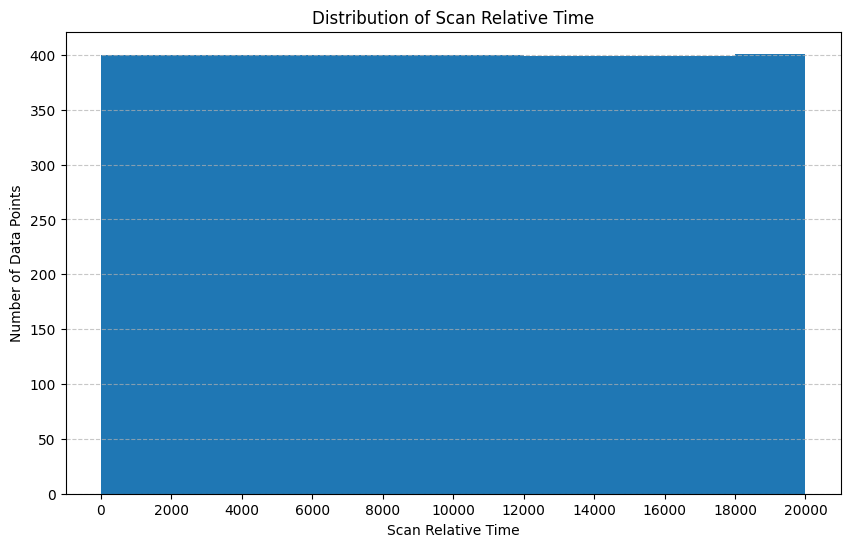

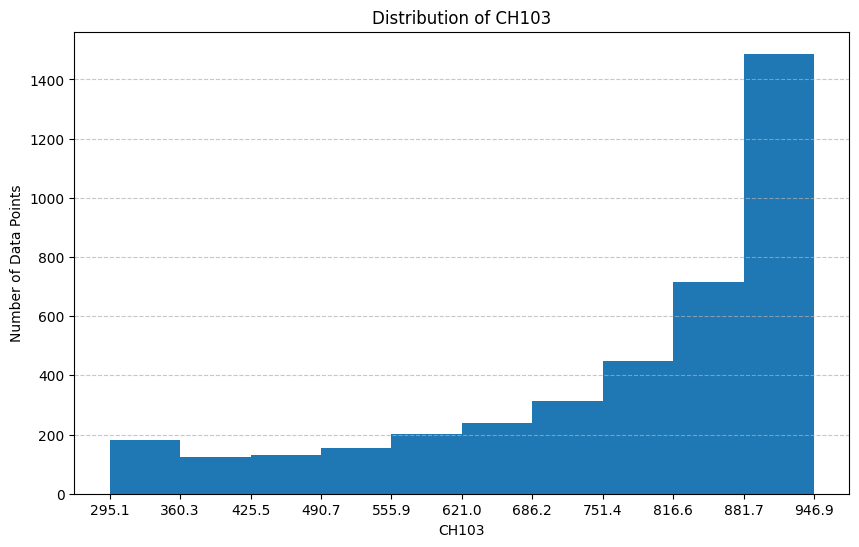

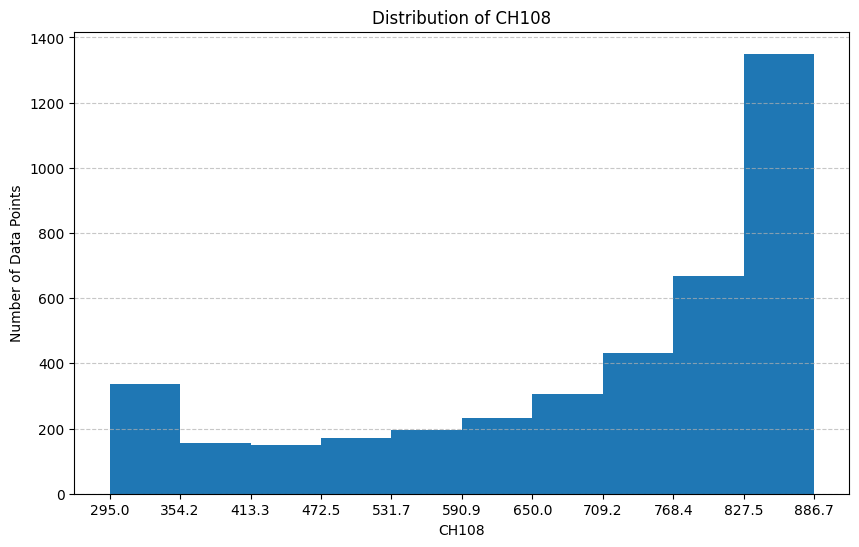

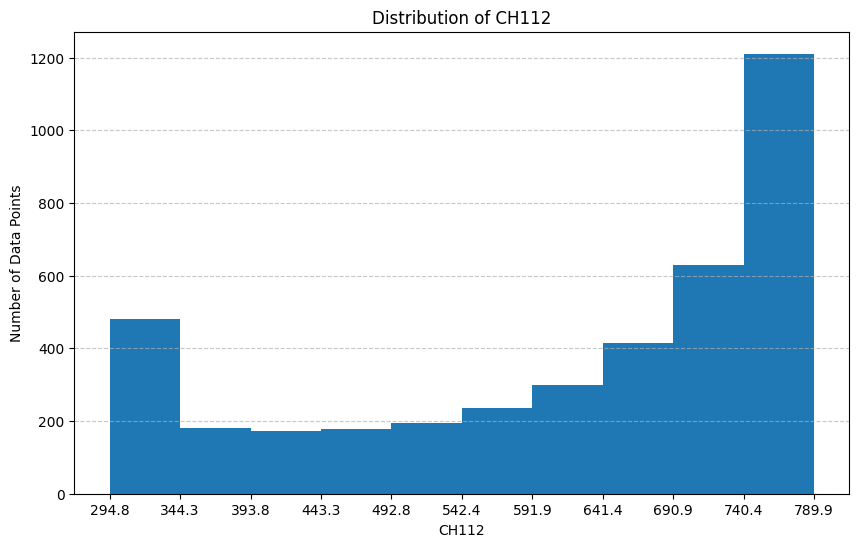

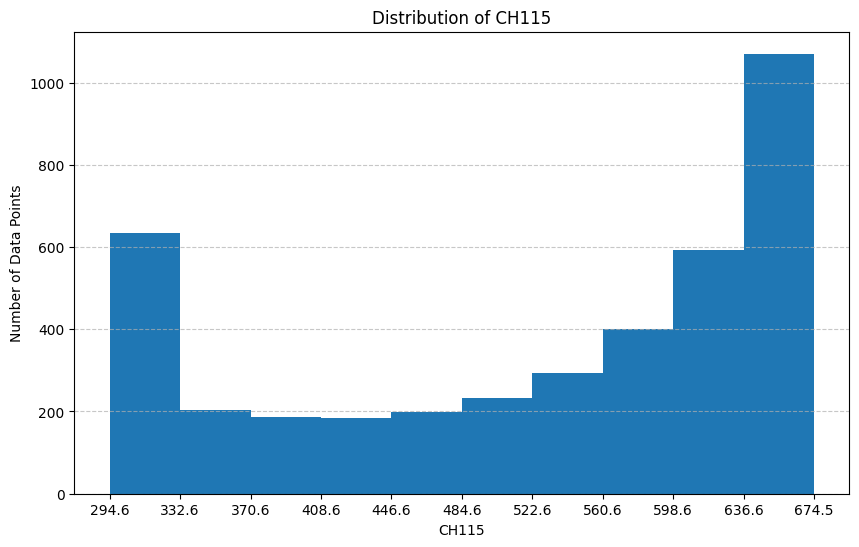

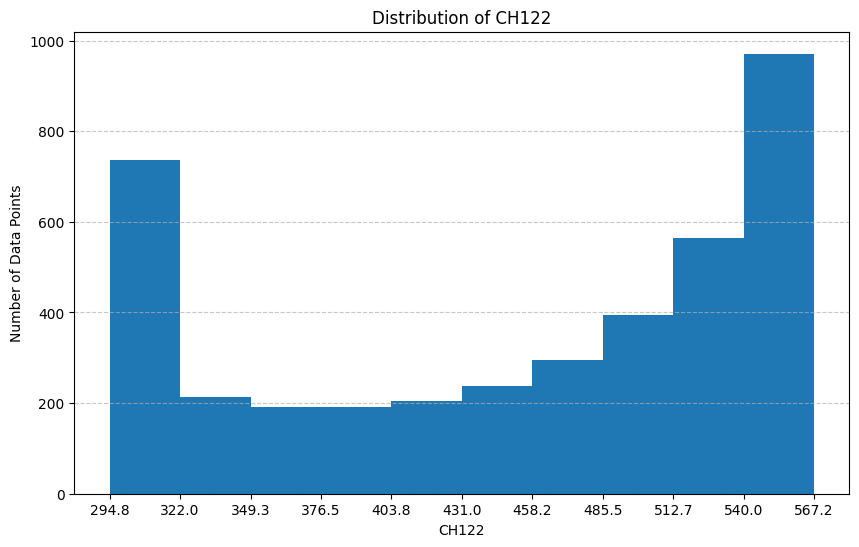

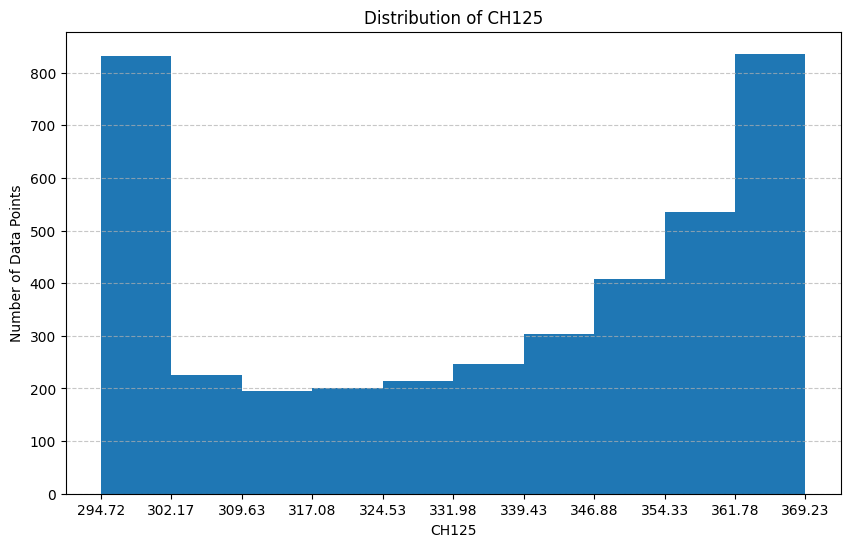

In [ ]:
# prompt: #data visualisation, bar graph for every column header vs. number of data points in a range of value

import matplotlib.pyplot as plt

# Assuming 'data_fl' DataFrame is already loaded as in your previous code

for col in data_fl.columns:
    # Determine the range of values for the current column
    min_val = data_fl[col].min()
    max_val = data_fl[col].max()

    # Create bins for the histogram
    num_bins = 10  # Adjust as needed
    bins = np.linspace(min_val, max_val, num_bins + 1)

    # Count data points in each bin
    hist, _ = np.histogram(data_fl[col], bins=bins)

    # Create the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], hist, width=(max_val - min_val) / num_bins, align='edge')
    plt.xlabel(col)
    plt.ylabel("Number of Data Points")
    plt.title(f"Distribution of {col}")
    plt.xticks(bins)  # Set x-axis ticks to the bin edges
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()


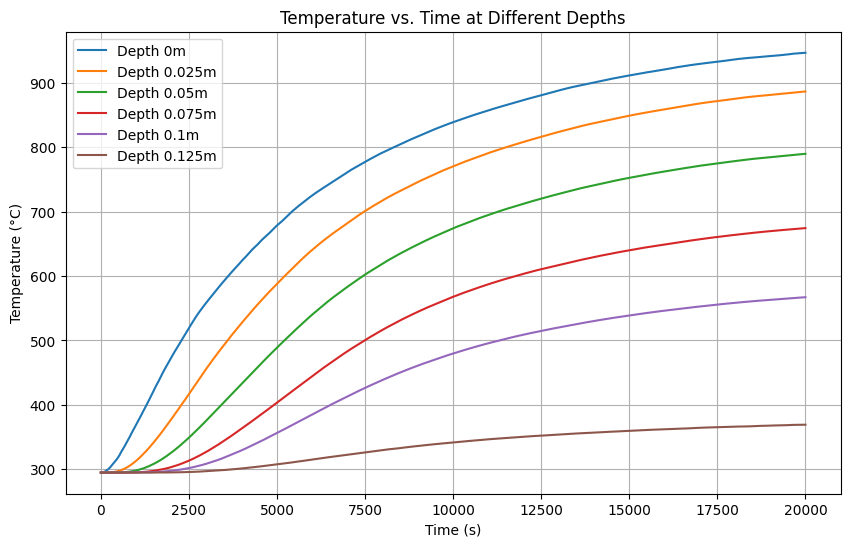

In [ ]:
# Define depths corresponding to each channel
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]

# Extract time and temperature data
time = data_fl['Scan Relative Time']
temperature_columns = ['CH103', 'CH108', 'CH112', 'CH115', 'CH122', 'CH125']

# Plot each temperature profile
plt.figure(figsize=(10, 6))  # Set figure size
for i, col in enumerate(temperature_columns):
    plt.plot(time, data_fl[col], label=f"Depth {depths[i]}m")  # Plot with depth labels

# Customize plot
plt.xlabel("Time (s)")  # Label X-axis
plt.ylabel("Temperature (°C)")  # Label Y-axis
plt.title("Temperature vs. Time at Different Depths")  # Title
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()  # Display plot


Using a 3D Line Plot (for clear depth-wise variation)

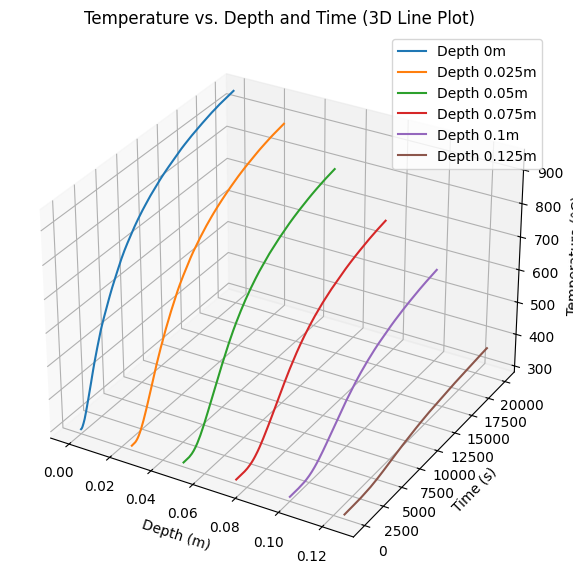

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define depths corresponding to each channel
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]

# Extract time and temperature data
time = data_fl['Scan Relative Time']
temperature_columns = ['CH103', 'CH108', 'CH112', 'CH115', 'CH122', 'CH125']

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each depth's temperature variation
for i, col in enumerate(temperature_columns):
    ax.plot([depths[i]] * len(time), time, data_fl[col], label=f"Depth {depths[i]}m")

# Customize plot
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Temperature (°C)")
ax.set_title("Temperature vs. Depth and Time (3D Line Plot)")
ax.legend()
plt.show()


Using a 3D Surface Plot (for a continuous temperature profile)

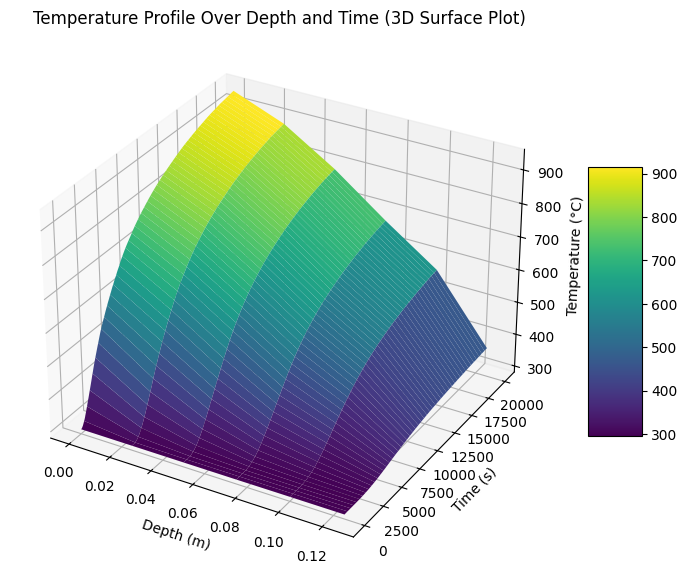

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # For color maps

# Convert time and depths to meshgrid format
depth_mesh, time_mesh = np.meshgrid(depths, time)

# Convert temperature data to a NumPy array
temperature_values = np.array([data_fl[col].values for col in temperature_columns]).T  # Transpose for correct shape

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(depth_mesh, time_mesh, temperature_values, cmap=cm.viridis, edgecolor='none')

# Customize plot
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Temperature (°C)")
ax.set_title("Temperature Profile Over Depth and Time (3D Surface Plot)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add color bar
plt.show()


In [ ]:
def read_data(filename, depths):
    df = data_fl # Assuming tab-separated values
    # df = pd.read_csv(filename, sep='\t')
    print(df)
    time = df['Scan Relative Time'].values  # Extract time values
    observe_x = np.array(depths).reshape(-1, 1)  # Define depth positions (x-values)
    observe_T = df.drop(columns=['Scan Relative Time']).values  # Temperature data

    print(observe_T)

    print('The shape of time is:' + str(time.shape))

    max_time = time.max()
    # time = time / max_time  # Normalize time to [0, 1] range if needed
    print('The Maximum time is:', max_time)
    return time, observe_x, observe_T, max_time


In [ ]:
# Set depths manually as provided in your description (replace with actual values)
depths = [0, 0.025, 0.05, 0.075, 0.1, 0.125]  # Example depths in meters; adjust as needed
# time, observe_x, observe_T, max_time = read_data('/content/data_fl (1).csv', depths)
time, observe_x, observe_T, max_time = read_data('/content/New_Data.csv', depths)

      Scan Relative Time       CH103       CH108       CH112       CH115  \
0               0.000000  295.150187  295.003021  294.796882  294.641369   
1               5.005122  295.154193  295.013397  294.799501  294.642262   
2              10.005120  295.156482  295.004525  294.793077  294.641135   
3              15.005123  295.150637  295.006212  294.792200  294.641400   
4              20.005119  295.151375  295.004593  294.789251  294.641495   
...                  ...         ...         ...         ...         ...   
3993        19980.005120  946.761274  886.616596  789.819777  674.444126   
3994        19985.005120  946.784480  886.659588  789.844881  674.474713   
3995        19990.005120  946.907938  886.685396  789.876204  674.501043   
3996        19995.005120  946.833038  886.712204  789.897797  674.525557   
3997        20000.005130  946.848524  886.721181  789.918952  674.545931   

           CH122       CH125  
0     294.804220  294.726548  
1     294.810146  294.723

In [ ]:
print(observe_T)
print(observe_x)
print(time)

[[295.150187  295.0030212 294.7968817 294.6413692 294.8042198 294.7265485]
 [295.1541933 295.013397  294.7995006 294.6422619 294.8101463 294.7239978]
 [295.1564824 295.0045245 294.7930775 294.641135  294.8075063 294.7284886]
 ...
 [946.9079376 886.6853962 789.8762036 674.5010425 567.1555585 369.16241  ]
 [946.8330379 886.7122043 789.8977974 674.5255574 567.1755382 369.1667932]
 [946.848524  886.721181  789.918952  674.5459314 567.1965727 369.1800724]]
[[0.   ]
 [0.025]
 [0.05 ]
 [0.075]
 [0.1  ]
 [0.125]]
[0.00000000e+00 5.00512188e+00 1.00051197e+01 ... 1.99900051e+04
 1.99950051e+04 2.00000051e+04]


In [ ]:
# Flatten array to 1D
observe_T_flat = observe_T.flatten()
observe_x_flat = observe_x.flatten()

# Compute skewness
T_skewness = skew(observe_T_flat)
observe_x_skewness = skew(observe_x_flat)

print(f"Skewness of observed temperature: {T_skewness:.4f}")
print(f"Skewness of observed temperature: {observe_x_skewness:.4f}")


Skewness of observed temperature: 0.2221
Skewness of observed temperature: 0.0000


# Code

Initial guesses

In [ ]:
# Cp = dde.Variable(80000)
# k = dde.Variable(0.1)

In [ ]:
# # # Normalization
# Cp_log = dde.Variable(115000)  # Train log(Cp)
# k_log = dde.Variable(0.1)  # Train log(k)

In [ ]:
# Cp_log = dde.Variable(np.log(5000))  # Train log(Cp)
# k_log = dde.Variable(np.log(0.1))

In [ ]:
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Define min and max values
x_min, x_max = 0, 0.125
t_min, t_max = 0, 20000.00513

# Normalize space and time
geom = dde.geometry.Interval(0, 1)  # Normalized x ∈ [0,1]
timedomain = dde.geometry.TimeDomain(0, 1)  # Normalized t ∈ [0,1]
geomtime = dde.geometry.GeometryXTime(geom, timedomain)


In [ ]:
# geom = dde.geometry.Interval(0, 0.125)
# timedomain = dde.geometry.TimeDomain(0, 31175.00513)
# geomtime = dde.geometry.GeometryXTime(geom, timedomain)

PDE

In [ ]:
# # Define the
# def pde(x, y):
#     T = y[:, 0:1]
#     dT_t = dde.grad.jacobian(y, x, i=0, j=1)
#     dT_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
#     return Cp_log * dT_t - k_log * dT_xx
    # return tf.exp(Cp_log) * dT_t - tf.exp(k_log) * dT_xx

In [ ]:
# # Define the
# def pde(x, y):
#     T = y[:, 0:1]
#     dT_t = dde.grad.jacobian(y, x, i=0, j=1)
#     dT_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
#     return Cp*dT_t - k* dT_xx

In [ ]:
# Scaling constants
L = x_max - x_min  # = 0.125
T_time = t_max - t_min  # ≈ 20000.00513

# Rescale k to match normalized domain
k_scaled = 0.8
Cp_scaled = 80000*((L**2)/T_time)

# Trainable parameters
k = dde.Variable(k_scaled)
Cp = dde.Variable(Cp_scaled)

def pde(x, y):
    T_val = y[:, 0:1]
    dT_t = dde.grad.jacobian(y, x, i=0, j=1)
    dT_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)

    # # Rescale k to match normalized domain
    # k_scaled = k * T_time / (L**2)

    return Cp * dT_t - Cp_scaled * dT_xx


IC and BC

In [ ]:
# T0 = 295.6390  # Initial temperature in Kelvin
T0 = 294.6390

In [ ]:
T_min, T_max = 294.6390, 946.9079  # Assuming expected range of temperature (e.g., boiling and freezing points)

def normalize_T(T):
    return (T - T_min) / (T_max - T_min)

T0_scaled = normalize_T(T0)  # Normalize initial temperature

def fun_init(x):
    return np.full_like(x[:, 0:1], T0_scaled)

ic1 = dde.icbc.IC(geomtime, fun_init, lambda _, on_initial: on_initial)


In [ ]:
# T0 = 293.0  # Initial temperature in Kelvin

# def fun_init(x):
#     return np.full_like(x[:, 0:1], T0)

# ic1 = dde.icbc.IC(geomtime, fun_init, lambda _, on_initial: on_initial)
# ic1 = np.array(ic1)
# observe_u = np.array(observe_u)

Prepating Data For Input

In [ ]:
xx, tt = np.meshgrid(observe_x, time)

xx

array([[0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       ...,
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125],
       [0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125]])

In [ ]:
tt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.00512188e+00, 5.00512188e+00, 5.00512188e+00, 5.00512188e+00,
        5.00512188e+00, 5.00512188e+00],
       [1.00051197e+01, 1.00051197e+01, 1.00051197e+01, 1.00051197e+01,
        1.00051197e+01, 1.00051197e+01],
       ...,
       [1.99900051e+04, 1.99900051e+04, 1.99900051e+04, 1.99900051e+04,
        1.99900051e+04, 1.99900051e+04],
       [1.99950051e+04, 1.99950051e+04, 1.99950051e+04, 1.99950051e+04,
        1.99950051e+04, 1.99950051e+04],
       [2.00000051e+04, 2.00000051e+04, 2.00000051e+04, 2.00000051e+04,
        2.00000051e+04, 2.00000051e+04]])

In [ ]:
X = np.vstack((np.ravel(xx), np.ravel(tt))).T  # Combined (x, t) coordinates
df = pd.DataFrame(X, columns =['Depths', 'Time'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Depths,Time
0,0.000,0.00000
1,0.025,0.00000
2,0.050,0.00000
3,0.075,0.00000
4,0.100,0.00000
...,...,...
23983,0.025,20000.00513
23984,0.050,20000.00513
23985,0.075,20000.00513
23986,0.100,20000.00513


In [ ]:
X

array([[0.00000000e+00, 0.00000000e+00],
       [2.50000000e-02, 0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00],
       ...,
       [7.50000000e-02, 2.00000051e+04],
       [1.00000000e-01, 2.00000051e+04],
       [1.25000000e-01, 2.00000051e+04]])

In [ ]:
# Min & Max values for normalization
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])  # x ∈ [0, 0.125]
t_min, t_max = np.min(X[:, 1]), np.max(X[:, 1])  # t ∈ [0, 31175.00513]

# Normalize function
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Normalize depth (x) and time (t)
X_normalized = np.copy(X)
X_normalized[:, 0] = normalize(X[:, 0], x_min, x_max)  # Normalize x
X_normalized[:, 1] = normalize(X[:, 1], t_min, t_max)  # Normalize t

print("Normalized X (x, t):")
print(X_normalized)

Normalized X (x, t):
[[0.  0. ]
 [0.2 0. ]
 [0.4 0. ]
 ...
 [0.6 1. ]
 [0.8 1. ]
 [1.  1. ]]


In [ ]:
observe_T = observe_T.flatten().reshape(-1, 1)  # Flatten temperature data for boundary conditions
observe_T

array([[295.150187 ],
       [295.0030212],
       [294.7968817],
       ...,
       [674.5459314],
       [567.1965727],
       [369.1800724]])

In [ ]:
print(observe_T.shape)

(23988, 1)


In [ ]:
# Extract min and max temperature
T_min = np.min(observe_T)
T_max = np.max(observe_T)

print(f"Min Temperature: {T_min:.4f} K")
print(f"Max Temperature: {T_max:.4f} K")

Min Temperature: 294.6390 K
Max Temperature: 946.9079 K


In [ ]:
# T_min, T_max = 273.0, 373.0  # Adjust based on real data

In [ ]:
# Normalize observed temperature
def normalize_T(T):
    return (T - T_min) / (T_max - T_min)

observe_T_normalized = normalize_T(observe_T)

# Use normalized values in PointSetBC
observe_u = dde.icbc.PointSetBC(X_normalized, observe_T_normalized)


In [ ]:
observe_T_normalized

array([[7.83640312e-04],
       [5.58018944e-04],
       [2.41984404e-04],
       ...,
       [5.82439070e-01],
       [4.17860689e-01],
       [1.14279602e-01]])

In [ ]:
# observe_u = dde.icbc.PointSetBC(X, observe_T)

In [ ]:
print(X.shape)

(23988, 2)


In [ ]:
# Define min and max values
x_min, x_max = 0, 0.125
t_min, t_max = 0, 20000.00513
T_min, T_max = 294.6390, 946.9079  # Assuming expected range of temperature

print(f"x_min: {x_min}, x_max: {x_max}")
print(f"t_min: {t_min}, t_max: {t_max}")
print(f"T_min (Normalization): {T_min}, T_max (Normalization): {T_max}")
print(f"T_min (Data): {np.min(observe_T):.4f}, T_max (Data): {np.max(observe_T):.4f}")  # Check actual data range

x_min: 0, x_max: 0.125
t_min: 0, t_max: 20000.00513
T_min (Normalization): 294.639, T_max (Normalization): 946.9079
T_min (Data): 294.6390, T_max (Data): 946.9079


Defining a time-dependent **PDE problem**

In [ ]:
# data = dde.data.TimePDE(
#     geomtime,                      # The geometry and time domain (spatial and temporal boundaries)
#     pde,                           # The PDE to be solved
#     [ic1, observe_u],              # List of initial conditions and observations
#     num_domain=1000,               # Number of points sampled in the interior of the domain (training points)
#     num_initial=100,               # Number of points at the initial time to apply the initial condition
#     anchors=X,                     # Observation points where the solution will be sampled during training
#     num_test=20000,                # Number of test points for evaluating the model
#     solution=fun_init,
# )

In [ ]:
data = dde.data.TimePDE(
    geomtime,                      # The geometry and time domain (spatial and temporal boundaries)
    pde,                           # The PDE to be solved
    [ic1, observe_u],              # List of initial conditions and observations
    num_domain=1000,               # Number of points sampled in the interior of the domain (training points)
    num_initial=100,               # Number of points at the initial time to apply the initial condition
    anchors=X_normalized,          # Observation points where the solution will be sampled during training
    num_test=40000,                # Number of test points for evaluating the model
    # solution=fun_init,

)

In [ ]:
# layer_size = [2] + [24] *6 + [1]
# activation = "tanh"
# initializer = "Glorot uniform" # Change to He normal, LeCun normal,Glorot normal, etc.
# net = dde.nn.FNN(layer_size, activation, initializer)

In [ ]:
# lr_schedule = dde.callbacks.LearningRateScheduler(lambda t: 1e-5 * 0.95 ** (t / 5000))
# model.compile("adam", lr=1e-5, lr_decay=lr_schedule)


In [ ]:
# import tensorflow as tf

# model = dde.Model(data, net)

# # Define learning rate schedule
# initial_learning_rate = 0.000001  # Your initial learning rate
# decay_steps = 5000            # Decay steps as in your original code
# decay_rate = 0.95             # Decay rate as in your original code

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=decay_steps,
#     decay_rate=decay_rate,
#     staircase=False  # Use continuous decay (default)
# )

# # Compile the model with the scheduler
# # Pass the lr_schedule as a function to the lr argument, providing the step
# model.compile("rmsprop", lr=lambda: lr_schedule(model.train_state.step), metrics=["l2 relative error"],
#               external_trainable_variables=[Cp_log, k_log])

In [ ]:
# dde.optimizers.set_LBFGS_options({'maxcor': 50, 'ftol': 1.0 * np.finfo(float).eps})

# Training

In [ ]:
layer_size = [2, 8,16,8, 4, 1]  # Example layer sizes
# layer_size = [2] + [20] *4 + [1]
activation = "tanh"
initializer = "Glorot normal"

class CustomFNN(dde.nn.FNN):
    def __init__(self, layer_size, activation, initializer, dropout_rate=0.5):
        super().__init__(layer_size, activation, initializer)
        self.dropout_layers = [tf.keras.layers.Dropout(dropout_rate) for _ in range(len(layer_size) - 2)]

    def call(self, inputs, training=None):
        x = inputs
        for i, layer in enumerate(self.hidden_layers):
            x = layer(x)
            if training:
                x = self.dropout_layers[i](x, training=training)
        return self.output_layer(x)

# Use CustomFNN instead of dde.nn.Sequential
net = CustomFNN(layer_size, activation, initializer)


In [ ]:
# # Modified network definition using dde.nn.Sequential to include Dropout
# net = dde.nn.Sequential()
# net.add_layers.InputLayer(input_shape=(2,)) # Input layer, input_shape should be (input dimension,)
# for i in range(6): # Hidden layers with Dropout
#     net.add_layers.Dense(layer_size[i+1], activation=activation, kernel_initializer=initializer)
#     net.add_layers.Dropout(0.3) # Dropout layer after each hidden layer, you can adjust dropout rate here
# net.add_layers.Dense(layer_size[-1], kernel_initializer=initializer) # Output layer

In [ ]:
# model = dde.Model(data, net)
# # model.compile("adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=[Cp,k])
# # model.compile("adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=[Cp_log,k_log])
# # model.compile("adam", lr=0.0000005, metrics=["mean squared error","l2 relative error"],
#               # external_trainable_variables=[Cp_log, k_log])    #"l2 relative error",

# # lr_schedule = dde.callbacks.LearningRateScheduler(lambda t: 1e-5 * 0.95 ** (t / 5000))
# model.compile("rmsprop", lr=0.0000001, metrics=["l2 relative error"],
#               external_trainable_variables=[Cp_log, k_log])    #"l2 relative error",


# # model.compile("rmsprop", lr_schedule, metrics=["l2 relative error"],
# #               external_trainable_variables=[Cp_log, k_log])

**Physics-Informed Neural Networks (PINNs)**

X: Residual loss (PDE equation error)

Y: Boundary condition loss

Z: Initial condition loss

In [ ]:
model = dde.Model(data, net)
# model.compile("rmsprop", lr=0.0001, external_trainable_variables=[Cp_log, k_log])  # metrics=["l2 relative error"],
model.compile("adam", lr=0.01, external_trainable_variables=[Cp, k])  # metrics=["l2 relative error"],

Compiling model...
Building feed-forward neural network...
'build' took 0.075598 s

'compile' took 0.539972 s



In [ ]:
variable = dde.callbacks.VariableValue([Cp,k], period=1000,filename="variables.dat")  #filename="variables.dat"
losshistory, train_state = model.train(iterations=20000, callbacks=[variable])
# model.compile("adam", lr=0.001)
# losshistory, train_state = model.train(iterations=50000, callbacks=[dde.callbacks.EarlyStopping(min_delta=1e-5, patience=5000)])


Training model...

7183      [2.84e-04, 1.87e-06, 4.95e-04]    [3.54e-04, 1.87e-06, 4.95e-04]    []  
8000      [2.84e-04, 6.81e-07, 4.81e-04]    [3.64e-04, 6.81e-07, 4.81e-04]    []  
9000      [2.82e-04, 4.20e-07, 4.76e-04]    [3.63e-04, 4.20e-07, 4.76e-04]    []  
10000     [2.82e-04, 3.58e-07, 4.75e-04]    [3.60e-04, 3.58e-07, 4.75e-04]    []  
11000     [2.78e-04, 1.32e-06, 4.84e-04]    [3.57e-04, 1.32e-06, 4.84e-04]    []  
12000     [2.70e-04, 1.69e-05, 5.07e-04]    [3.50e-04, 1.69e-05, 5.07e-04]    []  
13000     [2.85e-04, 1.43e-06, 4.69e-04]    [3.84e-04, 1.43e-06, 4.69e-04]    []  
14000     [2.89e-04, 4.28e-06, 4.65e-04]    [3.98e-04, 4.28e-06, 4.65e-04]    []  
15000     [2.85e-04, 2.36e-07, 4.61e-04]    [4.17e-04, 2.36e-07, 4.61e-04]    []  
16000     [2.77e-04, 4.03e-05, 7.21e-04]    [3.86e-04, 4.03e-05, 7.21e-04]    []  
17000     [2.85e-04, 5.23e-07, 4.59e-04]    [4.28e-04, 5.23e-07, 4.59e-04]    []  
18000     [2.87e-04, 2.84e-07, 4.61e-04]    [4.36e-04, 2.84e-07, 4.6

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


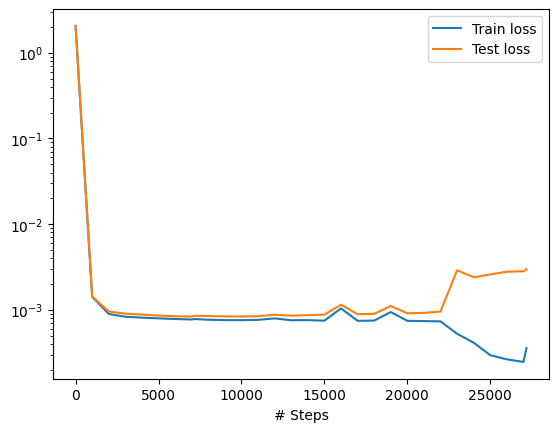

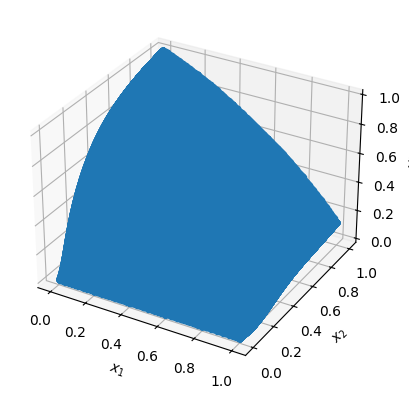

In [ ]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

What This Graph Represents

X-axis (
𝑥1
​
 ): Spatial domain variable (
𝑥
).

Y-axis (
𝑥2
​
 ): Temporal domain variable (
𝑡
).

Z-axis (
𝑢
(
𝑥
,
𝑡
)): The predicted solution from the neural network.

In [ ]:
# train_state.best_loss
# train_state.best_step
# train_state.step

# r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_normalized)

# Calculate regression metrics
mse = mean_squared_error(observe_T_normalized, y_pred)
r2 = r2_score(observe_T_normalized, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0002
R-squared: 0.9983


In [ ]:

# Calculate L2 relative error
def l2_relative_error(observe_T_normalized, y_pred):
    return np.linalg.norm(observe_T_normalized - y_pred) / np.linalg.norm(observe_T_normalized)

l2_rel_error = l2_relative_error(observe_T_normalized, y_pred)
print(f"L2 Relative Error: {l2_rel_error:.4f}")


L2 Relative Error: 0.0250


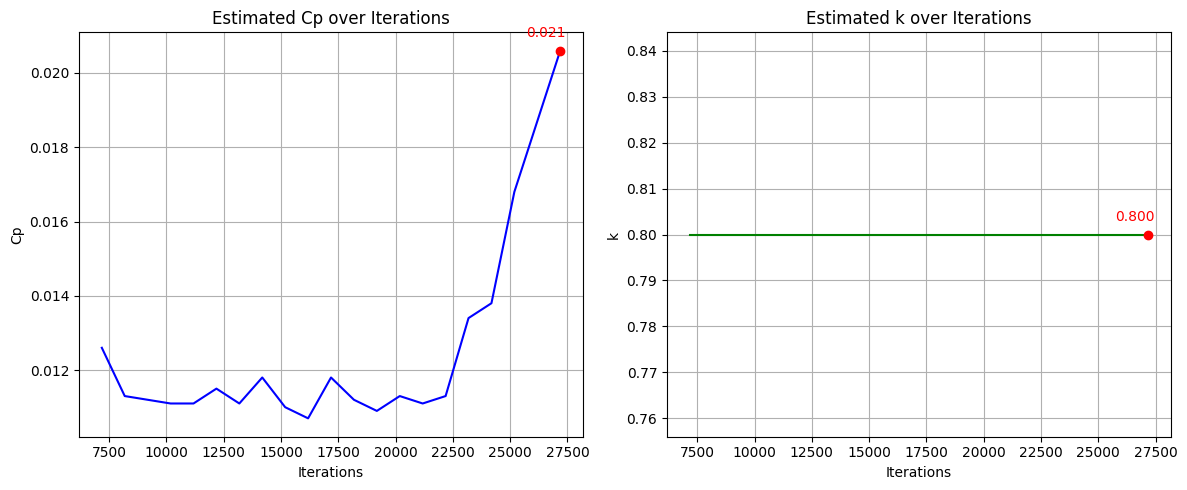

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store data
iterations = []
Cp_log_vals = []
k_log_vals = []

# Read and parse the variables.dat file
with open("variables.dat", "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                iter_val = int(parts[0])
                values = parts[1:]
                values = [v.replace('[','').replace(']','').replace(',','') for v in values]
                cp_log = float(values[0])
                k_log = float(values[1])
                iterations.append(iter_val)
                Cp_log_vals.append(cp_log)
                k_log_vals.append(k_log)
            except:
                continue

# Convert logs to actual values
# Cp_vals = np.exp(Cp_log_vals)
# k_vals = np.exp(k_log_vals)
Cp_vals = Cp_log_vals
k_vals = k_log_vals

# Last values
final_iter = iterations[-1]
final_Cp = Cp_vals[-1]
final_k = k_vals[-1]

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cp plot
axes[0].plot(iterations, Cp_vals, color='blue', label="Cp")
axes[0].scatter(final_iter, final_Cp, color='red', zorder=5)
axes[0].annotate(f"{final_Cp:.3f}", (final_iter, final_Cp),
                 textcoords="offset points", xytext=(-10,10), ha='center', color='red')
axes[0].set_title("Estimated Cp over Iterations")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Cp")
axes[0].grid(True)

# k plot
axes[1].plot(iterations, k_vals, color='green', label="k")
axes[1].scatter(final_iter, final_k, color='red', zorder=5)
axes[1].annotate(f"{final_k:.3f}", (final_iter, final_k),
                 textcoords="offset points", xytext=(-10,10), ha='center', color='red')
axes[1].set_title("Estimated k over Iterations")
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("k")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# # 2. Predict solution on test points
# T_pred_test = model.predict(X_normalized)

# # 3. Calculate PDE residuals on test points
# PDE_residuals_test = data.pde(X_normalized, T_pred_test)

# # 4. Calculate BC/IC residuals (if applicable - depends on your BC/IC setup)
# BC_IC_residuals_test = []
# for bc in data.bcs: # Assuming data.bcs is a list of boundary/initial conditions
#     if isinstance(bc, dde.icbc.DirichletBC) or isinstance(bc, dde.icbc.NeumannBC) or isinstance(bc, dde.icbc.RobinBC) or isinstance(bc, dde.icbc.OperatorBC): # Check for relevant BC types
#         bc_points = bc.points
#         bc_values_pred = model.predict(bc_points)
#         bc_values_true = bc.values(bc_points) # Assuming your BC has a 'values' function
#         bc_residuals = bc_values_pred - bc_values_true  # Or appropriate residual calculation based on BC type
#         BC_IC_residuals_test.append(bc_residuals)
#     elif isinstance(bc, dde.icbc.Initial): # For Initial conditions
#         ic_points = bc.points
#         ic_values_pred = model.predict(ic_points)
#         ic_values_true = bc.values(ic_points)
#         ic_residuals = ic_values_pred - ic_values_true
#         BC_IC_residuals_test.append(ic_residuals)


# # 5. Calculate MSE for PDE and BC/IC residuals on test points
# mse_pde_test = np.mean(PDE_residuals_test**2)
# mse_bc_ic_test = 0 # Initialize
# if BC_IC_residuals_test:
#     bc_ic_residuals_concatenated = np.concatenate(BC_IC_residuals_test, axis=0) # Combine residuals from all BCs/ICs
#     mse_bc_ic_test = np.mean(bc_ic_residuals_concatenated**2)


# print(f"Test Set Metrics (without true solution):")
# print(f"  MSE of PDE residuals on test points: {mse_pde_test:.4e}")
# print(f"  MSE of BC/IC residuals on test points: {mse_bc_ic_test:.4e}")

# # You can extend this to calculate other statistics (e.g., max absolute residual, etc.)

# unscale

In [ ]:
import pandas as pd

# Load the saved data from "variables.dat"
result = pd.read_csv("variables.dat", delim_whitespace=True, header=None)

# Assign column names (if needed)
result.columns = ["Iteration", "Cp", "k"]

# Save to Excel
result.to_excel("variables.xlsx", index=False)

print("Saved to variables.xlsx")


<ipython-input-94-894e0f172691>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  result = pd.read_csv("variables.dat", delim_whitespace=True, header=None)


Saved to variables.xlsx


In [ ]:
results = pd.read_excel('/content/variables.xlsx')

In [ ]:
# prompt: interactive table

import ipywidgets as widgets
from IPython.display import display

# Assuming 'results' DataFrame is already loaded as in your provided code

# Create interactive widgets
iteration_slider = widgets.IntSlider(min=0, max=len(results) - 1, step=1, value=0, description="Iteration:")
cp_output = widgets.Output()
k_output = widgets.Output()

# Define function to update output when slider changes
def update_outputs(change):
    with cp_output:
        cp_output.clear_output()
        print(f"Cp at iteration {results['Iteration'][change.new]}: {results['Cp'][change.new]}")
    with k_output:
        k_output.clear_output()
        print(f"k at iteration {results['Iteration'][change.new]}: {results['k'][change.new]}")

# Link slider change to output update
iteration_slider.observe(update_outputs, names='value')

# Display the widgets and outputs
display(iteration_slider, cp_output, k_output)


IntSlider(value=0, description='Iteration:', max=20)

Output()

Output()

In [ ]:
Cp_estimated = 0.0206*(T_time/(L**2))
print(Cp_estimated)

26368.006763392


In [ ]:
# Cp_estimated = np.exp(Cp_log.value)
# k_estimated = np.exp(k_log.value)
Cp_estimated = np.exp(4.99)
k_estimated = np.exp(-5.88)

print(f"Estimated Cp: {Cp_estimated}")
print(f"Estimated k: {k_estimated}")


Estimated Cp: 146.9364234956948
Estimated k: 0.0027947852750368437


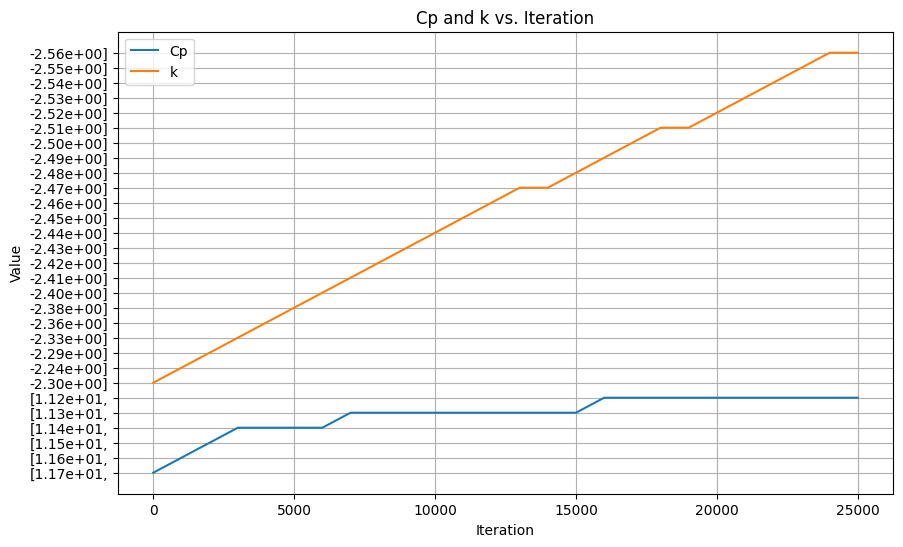

In [ ]:
# prompt: plot graph for results dataframe

import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is already loaded and contains 'Iteration', 'Cp', and 'k' columns

plt.figure(figsize=(10, 6))

plt.plot(results['Iteration'], results['Cp'], label='Cp')
plt.plot(results['Iteration'], results['k'], label='k')

plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Cp and k vs. Iteration")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
results

,Iteration,Cp,k
0,0,"[1.17e+01,",-2.30e+00]
1,1000,"[1.16e+01,",-2.24e+00]
2,2000,"[1.15e+01,",-2.29e+00]
3,3000,"[1.14e+01,",-2.33e+00]
4,4000,"[1.14e+01,",-2.36e+00]
5,5000,"[1.14e+01,",-2.38e+00]
6,6000,"[1.14e+01,",-2.40e+00]
7,7000,"[1.13e+01,",-2.41e+00]
8,8000,"[1.13e+01,",-2.42e+00]
9,9000,"[1.13e+01,",-2.43e+00]


In [ ]:
# Extract last row values
Cp_log = results.iloc[-1]["Cp"]
k_log = results.iloc[-1]["k"]

# Convert to float before formatting if necessary
Cp_log_float = float(Cp_log[1:-1])  # Remove brackets and convert to float
k_log_float = float(k_log[1:-1])  # Remove brackets and convert to float

# Now apply formatting for printing (if needed)
Cp_log_str = f"{Cp_log_float:.2e}"  # Scientific notation with 2 decimal places
k_log_str = f"{k_log_float:.2e}"

# Print values
print("Cp_log:", Cp_log_str)
print("k_log:", k_log_str)


Cp_log: 1.01e+01
k_log: 2.77e+00


In [ ]:
# Use float values for calculations
Cp_estimated = np.exp(Cp_log_float)
k_estimated = np.exp(k_log_float)

print(f"Estimated Cp: {Cp_estimated}")
print(f"Estimated k: {k_estimated}")

Estimated Cp: 24343.00942440838
Estimated k: 15.958634009794029


In [ ]:
Cp_learned = Cp_log.value
k_learned = k_log.value

print(f"Estimated Cp: {Cp_learned}")
print(f"Estimated k: {k_learned}")


AttributeError: 'str' object has no attribute 'value'

In [ ]:
# Cp_learned, k_learned = .get_variable_values([Cp_log, k_log])

In [ ]:
# with open("variables.dat", "r") as f:
#     lines = f.readlines()

In [ ]:
# data1 = np.loadtxt("variables.dat")
# iterations = data1[:, 0]  # First column is iteration number
# Cp_values = data1[:, 1]   # Second column is Cp_log
# k_values = data1[:, 2]    # Third column is k_log

# plt.plot(iterations, Cp_values, label="Cp_log")
# plt.plot(iterations, k_values, label="k_log")
# plt.xlabel("Iterations")
# plt.ylabel("Value")
# plt.legend()
# plt.title("Evolution of Trainable Variables")
# plt.show()


In [ ]:
# Cp_estimated = np.exp(Cp_log.value)
# k_estimated = np.exp(k_log.value)
Cp_estimated = np.exp(9.14)
k_estimated = np.exp(-1.72)

print(f"Estimated Cp: {Cp_estimated}")
print(f"Estimated k: {k_estimated}")

In [ ]:
import pandas as pd

data = []
for line in lines:
    parts = line.strip().split(":")  # Split at ":"
    if len(parts) < 2:
        continue  # Skip malformed lines

    iteration = int(parts[0].split()[1])  # Extract iteration number
    values = list(map(float, parts[1].split(",")))  # Convert values to float
    data.append([iteration] + values)

# Create DataFrame
df = pd.DataFrame(data, columns=["Iteration", "C1", "C2"])

In [ ]:
print(df.head())  # View first few rows

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df["Iteration"], df["C1"], label="C1")
plt.plot(df["Iteration"], df["C2"], label="C2")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.title("Convergence of External Variables")
plt.show()


In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_pred = model.predict(X_normalized)
# # Compute confusion matrix
# cm = confusion_matrix(observe_T_normalized, y_pred)

# # Display confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


In [ ]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# Assume you have already defined:
# - geomtime: your geometry and time domain
# - pde: your PDE function (e.g., for heat equation)
# - data: your dde.data.TimePDE object (WITHOUT solution=fun_init)
# - net: your neural network model
# - model: your compiled dde.Model

# Assume your model is already trained:
# losshistory, train_state = model.train(...)

# ------------------------------------------------------------------
# 1. Monitoring Loss Function Values (during training - already shown in output)
# ------------------------------------------------------------------
# DeepXDE's `model.train()` output typically shows the loss values
# at each iteration or epoch. You can observe these values directly in the output.

# If you want to save loss history for later analysis:
# (The `losshistory` object returned by `model.train()` already contains this)
# You can access it like this:
# print(losshistory.losses)  # List of total loss values
# print(losshistory.metrics_test) # If you had metrics, their values during training

# To plot the loss history (often useful to visualize convergence):
# dde.utils.plot_loss_history(losshistory) #  This is a convenient DeepXDE utility

# ------------------------------------------------------------------
# 2. Calculate and Plot PDE Residuals
# ------------------------------------------------------------------

def calculate_pde_residuals(model, data, num_points_residual=10000):
    """Calculates PDE residuals at random points in the domain."""
    domain = data.geom
    time_domain = data.timedomain
    geomtime = dde.geometry.GeometryXTime(domain, time_domain)

    X_residual = geomtime.random_points(num_points_residual) # Sample points in the domain
    T_pred = model.predict(X_residual) # Get model predictions at these points

    # Calculate PDE residuals using your PDE function
    # Assuming your pde function is defined as pde(X, T, dydx, ...) and returns residuals
    residuals = data.pde(X_residual, T_pred, model.grad_xs(X_residual)) # Use model.grad_xs for gradients

    return X_residual, residuals

X_res, residuals_val = calculate_pde_residuals(model, data)

# Plotting PDE Residuals (example for 1D space + time)
# You might need to adjust plotting based on your problem's dimensions

if X_res.shape[1] == 2: # Assuming X_res is [x, t]
    x_res = X_res[:, 0]
    t_res = X_res[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_res, t_res, c=residuals_val.flatten(), cmap='viridis', s=10) # Color by residual value
    plt.colorbar(label='PDE Residual Value')
    plt.xlabel('Spatial coordinate (x)')
    plt.ylabel('Time (t)')
    plt.title('PDE Residuals across Spacetime Domain')
    plt.grid(True)
    plt.show()

    # You can also look at the distribution of residuals:
    plt.figure(figsize=(6, 4))
    plt.hist(residuals_val.flatten(), bins=50, edgecolor='black')
    plt.xlabel('PDE Residual Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of PDE Residuals')
    plt.grid(True)
    plt.show()
else:
    print("Cannot easily plot residuals for dimensions other than 1D space + time in this example.")


# ------------------------------------------------------------------
# 3. Visualize the Solution
# ------------------------------------------------------------------

def plot_solution(model, data, num_points_plot=100):
    """Plots the PINN solution at different time points."""
    domain = data.geom
    time_domain = data.timedomain

    if domain.dim == 1: # 1D spatial domain
        x_plot = np.linspace(domain.lbound[0], domain.ubound[0], num_points_plot)[:, None]
        time_points = np.linspace(time_domain.lbound, time_domain.ubound, 5) # Example time points

        plt.figure(figsize=(8, 6))
        for t in time_points:
            X_plot = np.hstack((x_plot, np.full_like(x_plot, t))) # [x, t] for each time point
            T_pred_plot = model.predict(X_plot)
            plt.plot(x_plot, T_pred_plot, label=f't = {t:.2f}')

        plt.xlabel('Spatial coordinate (x)')
        plt.ylabel('Solution T(x, t)')
        plt.title('PINN Solution at Different Time Points')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Example: Temporal evolution at a fixed spatial point (e.g., x = 0)
        t_plot = np.linspace(time_domain.lbound, time_domain.ubound, num_points_plot)[:, None]
        x_fixed = np.array([[0.0]]) # Fixed x-coordinate
        X_plot_time = np.hstack((np.tile(x_fixed, (num_points_plot, 1)), t_plot))
        T_pred_time = model.predict(X_plot_time)

        plt.figure(figsize=(8, 6))
        plt.plot(t_plot, T_pred_time)
        plt.xlabel('Time (t)')
        plt.ylabel('Solution T(x=0, t)')
        plt.title('Temporal Evolution of Solution at x=0')
        plt.grid(True)
        plt.show()

    elif domain.dim == 2: # 2D spatial domain (example - you'll need to adapt for your specific geometry)
        # Example for a rectangular domain - adjust as needed
        x_plot = np.linspace(domain.lbound[0], domain.ubound[0], num_points_plot)
        y_plot = np.linspace(domain.lbound[1], domain.ubound[1], num_points_plot)
        X_grid, Y_grid = np.meshgrid(x_plot, y_plot)
        XY_plot = np.stack([X_grid.flatten(), Y_grid.flatten()], axis=1)
        t_fixed = (time_domain.lbound + time_domain.ubound) / 2 # Example fixed time

        X_plot_2D = np.hstack((XY_plot, np.full((XY_plot.shape[0], 1), t_fixed)))
        T_pred_2D = model.predict(X_plot_2D)
        T_grid = T_pred_2D.reshape(X_grid.shape)

        plt.figure(figsize=(8, 6))
        contour = plt.contourf(X_grid, Y_grid, T_grid, levels=20, cmap='viridis') # Contour plot
        plt.colorbar(contour, label='Solution T(x, y, t)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'PINN Solution at t = {t_fixed:.2f}')
        plt.axis('equal') # Ensure aspect ratio is 1:1
        plt.show()

    else:
        print("Solution plotting example is implemented for 1D and 2D spatial domains. Adapt for higher dimensions.")

plot_solution(model, data)


# ------------------------------------------------------------------
# 4. (Optional) Comparison with Numerical Solution (Conceptual - Requires external solver)
# ------------------------------------------------------------------
# # Conceptual steps:
# # 1. Solve the same PDE problem using a traditional numerical method (e.g., FDM, FEM)
# #    using libraries like NumPy (for FDM in simple cases), SciPy, or dedicated PDE solvers (like FEniCS, etc.)
# # 2. Generate numerical solution values on a grid or set of points.
# # 3. Interpolate or sample the numerical solution to get values at the same points where you evaluated the PINN solution.
# # 4. Compare the PINN solution and the numerical solution (e.g., plot them side-by-side, calculate differences, RMS error, etc.)
# #
# # Example (very simplified concept for 1D heat equation using FDM in NumPy - highly problem-dependent):
# # import numpy as np
# # def solve_heat_fdm(...): # Function to solve heat equation using FDM
# #    ... # Implement FDM solver
# #    return numerical_solution_grid, x_grid, t_grid
# #
# # numerical_sol, x_num, t_num = solve_heat_fdm(...)
# # T_pinn_on_num_grid = model.predict(np.stack([x_num.flatten(), t_num.flatten()], axis=1)) # Get PINN solution on same grid
# # diff = numerical_sol.flatten() - T_pinn_on_num_grid.flatten()
# # rms_error = np.sqrt(np.mean(diff**2))
# # print(f"RMS error compared to numerical solution: {rms_error}")
# # plt.plot(x_num, numerical_sol[..., -1], label="Numerical Solution (t=final)")
# # plt.plot(x_num, T_pinn_on_num_grid.reshape(numerical_sol.shape)[..., -1], label="PINN Solution (t=final)")
# # plt.legend()
# # plt.show()
# # (This is just a very basic conceptual outline - a full comparison requires careful implementation and consideration of grid compatibility, interpolation, etc.)


# ------------------------------------------------------------------
# 5. (Optional) Convergence Studies (Conceptual - requires retraining with different settings)
# ------------------------------------------------------------------
# # Conceptual steps:
# # - Train multiple PINN models with:
# #   - Different network architectures (e.g., varying number of layers, neurons per layer)
# #   - Different training parameters (e.g., learning rates, optimizers, iterations)
# #   - Different sampling densities (num_domain, num_initial, etc. in data creation)
# # - Evaluate the performance of each model using the metrics mentioned above (residuals, qualitative solution assessment).
# # - Observe if the solutions converge as you increase network complexity or refine training parameters.
# # - If solutions become more consistent and residuals decrease with more complex/refined settings, it can increase confidence in the results.